In [154]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sys
import os

In [155]:
sys.path.append(os.path.relpath('/Users/edoardo/AstroCosmoComputational/Students'))          

from pyACC.cosmology import distances_func as dist
from pyACC.calculus import interpolate
from pyACC.calculus import function

In [156]:
def f(x):
    return x**3

In [157]:
grid = np.arange(0,4,0.1)

In [158]:
MyFun = function.My1DFunction(f)
print(MyFun.eval(4))

64


In [159]:
print(MyFun.integrate(0,1)[0], MyFun.diff(3.0))

0.25 27.00000001006231


Text(0.5, 1.0, 'plot of f')

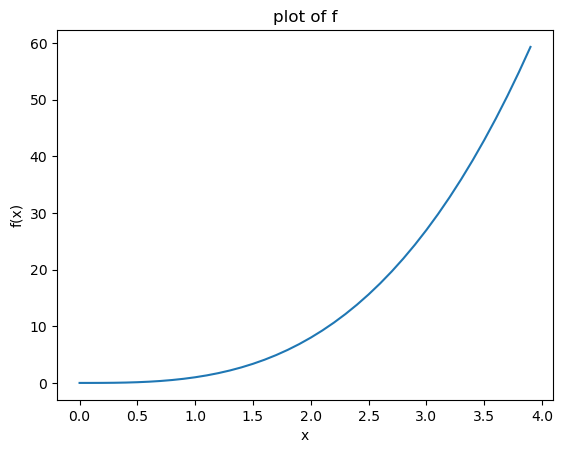

In [160]:
MyFun.plot(grid)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('plot of f')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


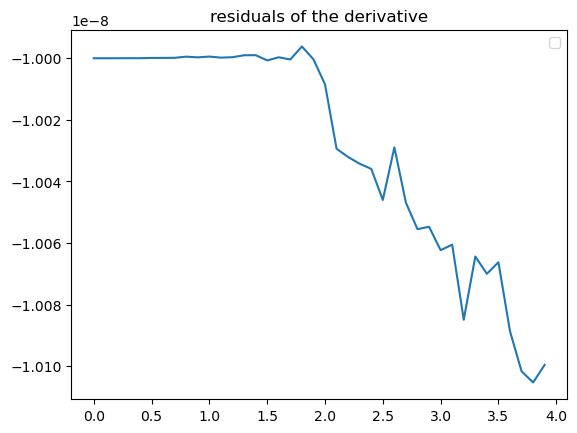

In [161]:
error=3*grid**2-MyFun.diff(grid)
plt.plot(grid,error)

plt.title('residuals of the derivative')
plt.legend()

### hubble function test

In [162]:
H = lambda z, Om_m: dist.hubble_function(z,0.319)

In [163]:
print(type(H))
z = np.arange(0,2,0.01)
Om_m = np.arange(0.1,0.6,0.1)
H_of_z = lambda z: H(z,Om_m=0.3)
H_of_Om_m = lambda Om_m: H(3, Om_m)
print(type(H_of_z))

<class 'function'>
<class 'function'>


In [164]:
my_H_of_z = function.My1DFunction(H_of_z)

In [165]:
my_H_of_z.eval(0)

0.319

In [166]:
my_H_of_z.diff(0)

0.14354999997800988

In [167]:
my_H_of_Om_m = function.My1DFunction(H_of_Om_m)

In [168]:
my_H_of_Om_m.eval(0.3)

1.4230403718798705

In [169]:
my_H_of_Om_m.diff(0.3)

0.0

### distance modulus derivatives

In [170]:
dL = dist.luminosity_distance(2)
mu = dist.distance_modulus_from_redshift(z)

In [171]:
mu_om = lambda om: dist.distance_modulus_from_redshift(1, 67, om)
print(type(mu_om))
print(mu_om(0.3))

<class 'function'>
14.195353842110876


In [172]:
MyMu_om = function.My1DFunction(mu_om)

Text(0, 0.5, '$\\mu(\\Omega_m) \\ (z=1)$')

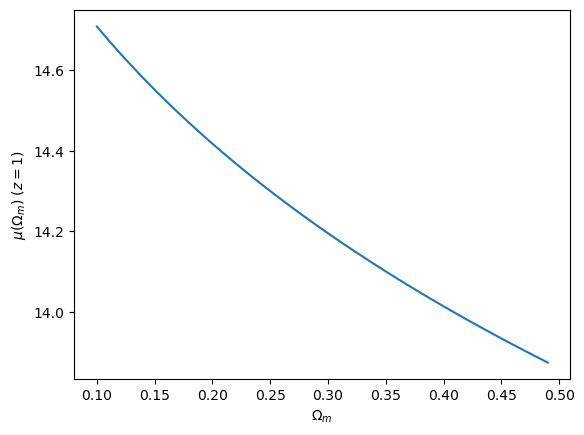

In [173]:
plt.plot(np.arange(0.1,0.5,0.01), [MyMu_om.eval(el) for el in np.arange(0.1,0.5,0.01)])
plt.xlabel('$\Omega_m$')
plt.ylabel('$\mu(\Omega_m) \ (z=1)$')

Text(0, 0.5, '$d\\mu/d\\Omega_m \\ (z=1)$')

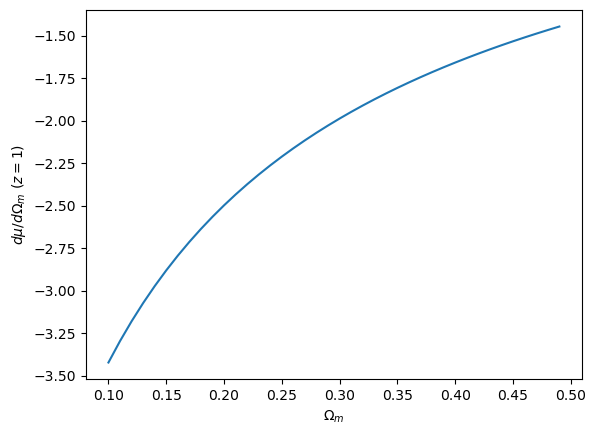

In [174]:
plt.plot(np.arange(0.1,0.5,0.01), [MyMu_om.diff(x) for x in np.arange(0.1,0.5,0.01)])
plt.xlabel('$\Omega_m$')
plt.ylabel('$d\mu/d\Omega_m \ (z=1)$')